In [564]:
from random import random 
from random import uniform
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from math import pi

In [565]:
random()

0.05115981015976789

In [566]:
for i in range(10):
    if random() > 0.5:
        print("heads")
    else:
        print("tails")

heads
tails
tails
tails
heads
heads
tails
tails
heads
heads


## Using the Monte Carlo method to estimate area of circle in a square

Exercise 1

In [567]:
yaxis = []
yaxis_unc = []
for k in range(8, 14, 1):
    N = 2**k
    l_100 = []
    for j in range(100):
        r = 1
        count = 0
        l = []
        for i in range(N):
            x = uniform(-1,1)
            y = uniform(-1,1)
            d = np.sqrt(x**2 + y**2)
            if d <= r:
                count = count + 1
            else:
                count = count
        #print(count)     
        l.append(count)
        l_100.append(l)
    
    m = np.mean(l_100)
    sd = np.std(l_100)
    unc = sd / np.sqrt(100)
    yaxis.append(m)
    yaxis_unc.append(unc)

print(yaxis)
print(yaxis_unc)

[200.63, 400.87, 805.07, 1610.29, 3213.75, 6432.82]
[0.6300246026942122, 0.8834766550396225, 1.1997712281931086, 1.8737820043964561, 2.6855306738147675, 3.631676747729622]


In [568]:
xaxis = []
for h in range(8, 14, 1):
    x = 2**h
    xaxis.append(x)
    
print(xaxis)

frac = np.array(yaxis) / np.array(xaxis) #the ratio between the mean value and N approaches the true value as N increases

[256, 512, 1024, 2048, 4096, 8192]


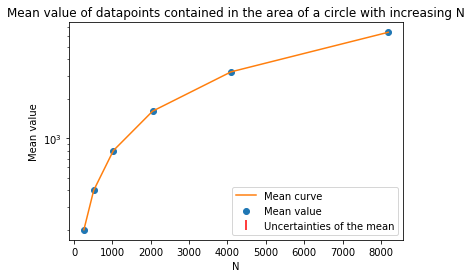

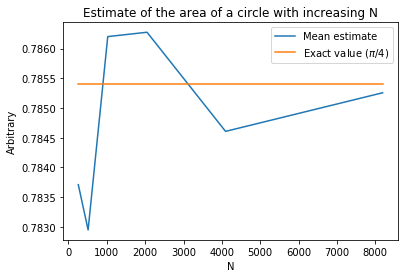

In [569]:
plt.figure()
plt.scatter(xaxis, yaxis, label='Mean value')
plt.semilogy(xaxis, yaxis, c='C1', label='Mean curve')
plt.errorbar(xaxis, yaxis, yerr=yaxis_unc, ls='none', label='Uncertainties of the mean', c='r')
plt.xlabel("N")
plt.ylabel("Mean value")
plt.title("Mean value of datapoints contained in the area of a circle with increasing N")
plt.legend()
plt.figure()
plt.plot(xaxis, frac, label='Mean estimate')
plt.plot(xaxis, np.repeat(np.pi/4, np.array(xaxis).size), label='Exact value ($\pi/4$)')
plt.xlabel("N")
plt.ylabel("Arbitrary")
plt.title("Estimate of the area of a circle with increasing N")
plt.legend()

Exercise 2

In [570]:
yaxis = []
yaxis_unc = []
for k in range(8, 14, 1):
    N = 2**k
    l_100 = []
    for j in range(100):
        r = 1
        count = 0
        l = []
        for i in range(N):
            x = uniform(0,1)
            y = uniform(0,1)
            f = (np.sin(1/x))**2
            if y <= f:
                count = count + 1
            else:
                count = count   
        l.append(count)
        l_100.append(l)
    
    m = np.mean(l_100)
    sd = np.std(l_100)
    unc = sd / np.sqrt(100)
    yaxis.append(m)
    yaxis_unc.append(unc)

xaxis = []
for h in range(8, 14, 1):
    x = 2**h
    xaxis.append(x)
    
frac = np.array(yaxis) / np.array(xaxis)

In [571]:
def func(x): #we find the actual value of the integral 
    return (np.sin(1/x))**2
function = integrate.quad(func, 0, 1)
print(function) #the second part of the array is the uncertainties in the answer

(0.6736035044513985, 0.0014381498854559708)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  This is separate from the ipykernel package so we can avoid doing imports until


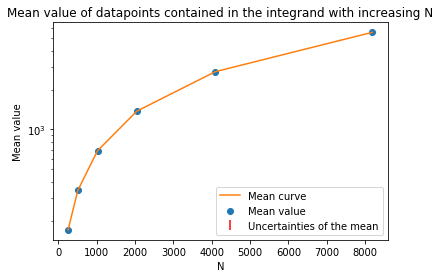

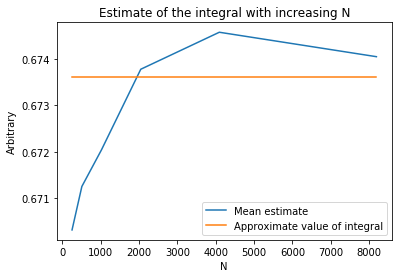

In [572]:
plt.figure()
plt.scatter(xaxis, yaxis, label='Mean value')
plt.semilogy(xaxis, yaxis, c='C1', label='Mean curve')
plt.errorbar(xaxis, yaxis, yerr=yaxis_unc, ls='none', label='Uncertainties of the mean', c='r')
plt.xlabel("N")
plt.ylabel("Mean value")
plt.title("Mean value of datapoints contained in the integrand with increasing N")
plt.legend()
plt.figure()
plt.plot(xaxis, frac, label='Mean estimate')
plt.xlabel("N")
plt.ylabel("Arbitrary")
plt.plot(xaxis, np.repeat(function[0], (np.array(xaxis).size)), label='Approximate value of integral')
plt.title("Estimate of the integral with increasing N")
plt.legend()

Exercise 3

In [586]:
yaxis = []
yaxis_unc = []
for k in range(8, 14, 1):
    N = 2**k
    l_100 = []
    for j in range(100):
        l = []
        for i in range(N):
            x = uniform(0,1) 
            f = np.sqrt(1-x**2)
            l.append(f)
        avg = np.average(l)    
        l_100.append(avg)
        
    m = np.mean(l_100)
    sd = np.std(l_100)
    unc = sd / np.sqrt(100)
    yaxis.append(m)
    yaxis_unc.append(unc)
print(yaxis)

xaxis = []
for h in range(8, 14, 1):
    x = 2**h
    xaxis.append(x)
    
frac = np.array(yaxis) / np.array(xaxis)
print(xaxis)

[0.7854148413170107, 0.7861007128942302, 0.7840250067824186, 0.7851841588120075, 0.7857272653623676, 0.7855234263417088]
[256, 512, 1024, 2048, 4096, 8192]


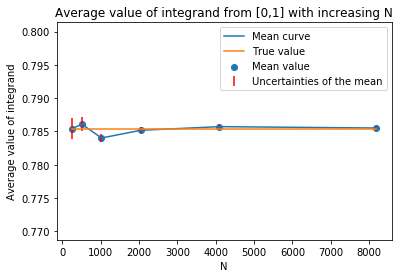

In [593]:
plt.figure() #as N increases, we get closer to the true value 
plt.scatter(xaxis, yaxis, label='Mean value')
plt.plot(xaxis, yaxis, label='Mean curve')
plt.plot(xaxis, np.array(np.repeat(np.pi/4, len(yaxis))), c='C1', label='True value')
plt.errorbar(xaxis, yaxis, yerr=yaxis_unc, ls='none', label='Uncertainties of the mean', c='r')
plt.xlabel("N")
plt.ylabel("Average value of integrand")
plt.title("Average value of integrand from [0,1] with increasing N")
plt.legend()


Exercise 4

In [601]:
N = 10**4
l_100 = []
for j in range(100):
    l = []
    for i in range(N):
        r = uniform(0,1)
        theta = uniform(0, 2*np.pi)
        x = r*np.cos(theta)
        y = r*np.sin(theta)
        f = np.average(x**2 + y**2)   
        l.append(f)
        
    avg = np.average(l)    
    l_100.append(avg)
        
sd = np.std(l_100)
unc = sd / np.sqrt(100)

x = []
for i in range(100):
    y = y + 1
    x.append(y)

0.33331285603097066 +/- 0.00026010714561454845


Text(0.5, 1.0, 'Distribution of 10$^4$ data points using polar coordinates')

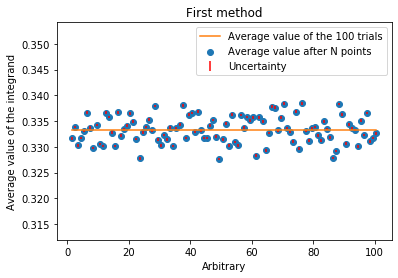

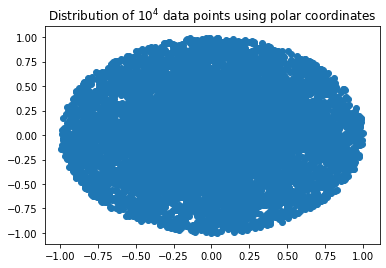

In [602]:
plt.figure()
plt.scatter(x, np.array(l_100), label='Average value after N points')
plt.errorbar(x, np.array(l_100), yerr=unc, c='r', ls='none', label='Uncertainty')
plt.plot(x, np.repeat(np.average(l_100), 100), c='C1', label='Average value of the 100 trials')
plt.xlabel("Arbitrary") #just to see how the values are distributed
plt.ylabel("Average value of the integrand") #see how values are located compared to true value
plt.title("First method")
plt.legend()
print(np.average(l_100), "+/-", unc)

xx = []
yy = []
for i in range(10**4):
    r = uniform(0,1)
    theta = uniform(0, 2*np.pi)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    xx.append(x)
    yy.append(y)
plt.figure()
plt.scatter(xx,yy)
plt.title("Distribution of 10$^4$ data points using polar coordinates")

In [603]:
N = 10**4
l_100 = []
for j in range(100):
    l = []
    for i in range(N):
        x = uniform(-1,1)
        y = uniform(-np.sqrt(1-x**2), np.sqrt(1-x**2)) 
        f = np.average(x**2 + y**2)
        l.append(f)
    
    avg = np.average(l)    
    l_100.append(avg)
        
sd = np.std(l_100)
unc = sd / np.sqrt(100)

x_ = []
for i in range(100):
    y = y + 1
    x_.append(y)

xx = []
yy = []
for i in range(N):
        x = uniform(-1,1)
        y = uniform(-np.sqrt(1-x**2), np.sqrt(1-x**2)) 
        xx.append(x)
        yy.append(y)

0.5551748585665052 +/- 0.0002747577696610527


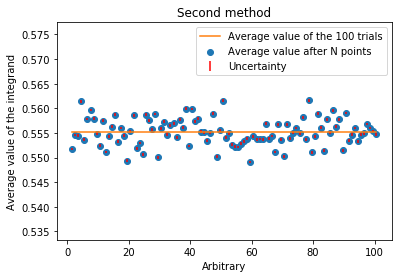

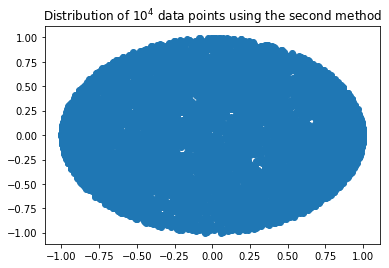

In [604]:
plt.figure()
plt.scatter(x_, np.array(l_100), label='Average value after N points')
plt.errorbar(x_, np.array(l_100), yerr=unc, c='r', ls='none', label="Uncertainty")
plt.plot(x_, np.repeat(np.average(l_100), 100), c='C1', label='Average value of the 100 trials')
plt.xlabel("Arbitrary") #just to see how the values are distributed
plt.ylabel("Average value of the integrand") #see how values are located compared to true value
plt.legend()
plt.title("Second method")
plt.figure()
plt.scatter(xx, yy)
plt.title("Distribution of 10$^4$ data points using the second method")
print(np.average(l_100), "+/-", unc)

In [605]:
N = 10**4
l_100 = []
for j in range(100):
    l = []
    for i in range(N):
        x = uniform(-1,1)
        y = uniform(-1,1) 
        f = x**2 + y**2
        if f <= 1:
            l.append(f)
    
    avg = np.average(l)    
    l_100.append(avg)
        
sd = np.std(l_100)
unc = sd / np.sqrt(100)

x_ = []
for i in range(100):
    y = y + 1
    x_.append(y)

xx = []
yy = []
for i in range(N):
        x = uniform(-1,1)
        y = uniform(-1,1)
        f = x**2 + y**2
        if f<=1:
            xx.append(x)
            yy.append(y)

0.4993353036468667 +/- 0.00035294913762843184


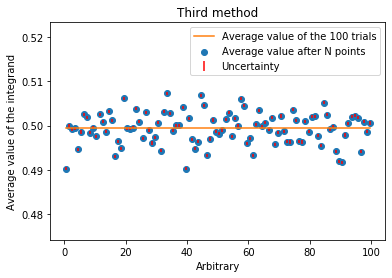

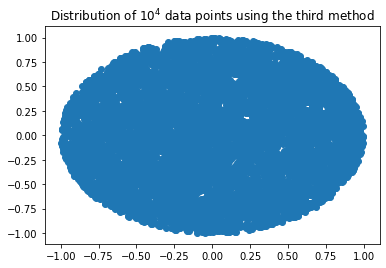

In [606]:
plt.figure()
plt.scatter(x_, np.array(l_100), label='Average value after N points')
plt.errorbar(x_, np.array(l_100), yerr=unc, c='r', ls='none', label="Uncertainty")
plt.plot(x_, np.repeat(np.average(l_100), 100), c='C1', label='Average value of the 100 trials')
plt.xlabel("Arbitrary") #just to see how the values are distributed
plt.ylabel("Average value of the integrand") #see how values are located compared to true value
plt.legend()
plt.title("Third method")
plt.figure()
plt.scatter(xx, yy)
plt.title("Distribution of 10$^4$ data points using the third method")
print(np.average(l_100), "+/-", unc)

Exercise 5

Text(0, 0.5, 'Distance')

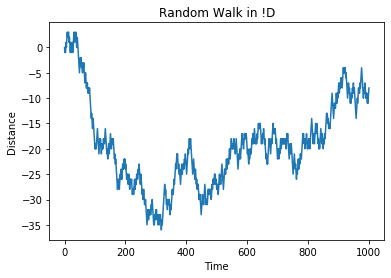

In [581]:
x = 0
y = 0
time = [x]
location = [y]
for i in range(1000):
    d = uniform(-1, 1)
    if d > 0:
        x = x + 1
        y = y + 1
    elif d < 0:
        x = x + 1
        y = y - 1
    
    time.append(x)
    location.append(y)

plt.plot(time, location)
plt.title("Random Walk in 1D")
plt.xlabel("Time")
plt.ylabel("Distance")

In [613]:
yaxis = []
y_rms = []
for k in range(8, 14, 1):
    N = 2**k
    l_100 = []
    for j in range(100):
        x = 0
        y = 0
        time = [x]
        location = [y]
        for i in range(N):
            d = uniform(-1, 1)
            if d > 0:
                x = x + 1
                y = y + 1
            elif d < 0:
                x = x + 1
                y = y - 1

            time.append(x)
            location.append(y)

        m = np.mean(location)
        sd = np.std(location)
        unc = sd / np.sqrt(N)
        l_100.append(m)
    
    mean = np.mean(l_100)
    sd_100 = np.std(l_100)
    uncertainty = sd_100 / np.sqrt(100)
    yaxis.append(mean)
    rms = np.sqrt(np.mean((np.array(l_100))**2))
    y_rms.append(rms)  
    
xaxis = []
for h in range(8, 14, 1):
    x = 2**h
    xaxis.append(x)

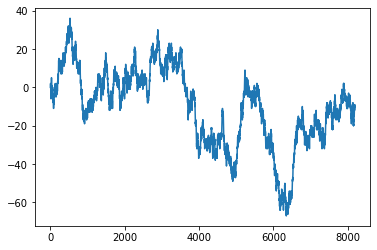

In [615]:
plt.plot(time, location)

-1.4694329045830974


Text(0, 0.5, 'RMS')

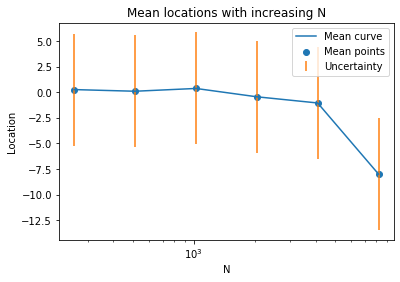

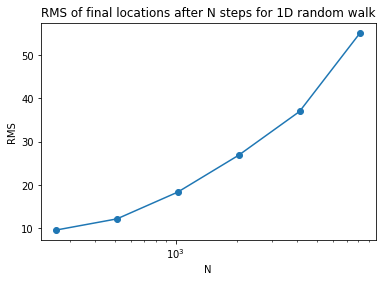

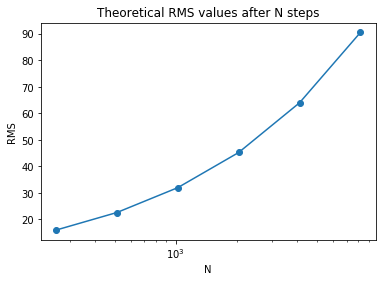

In [614]:
plt.figure()
plt.scatter(xaxis, yaxis, label="Mean points")
plt.semilogx(xaxis, yaxis, label="Mean curve")
plt.errorbar(xaxis, yaxis, yerr=uncertainty, ls='none', label='Uncertainty')
plt.title("Mean locations with increasing N")
plt.xlabel("N")
plt.ylabel("Location")
plt.legend()
print(np.mean(yaxis))
plt.figure()
plt.scatter(xaxis, y_rms)
plt.semilogx(xaxis, y_rms)
plt.title("RMS of final locations after N steps for 1D random walk")
plt.xlabel("N")
plt.ylabel("RMS")
plt.figure()
plt.scatter(xaxis, np.sqrt(xaxis))
plt.semilogx(xaxis, np.sqrt(xaxis))
plt.title("Theoretical RMS values after N steps")
plt.xlabel("N")
plt.ylabel("RMS")

Exercise 6

In [616]:
yaxis = []
y_rms = []
for k in range(8, 14, 1):
    N = 2**k
    l_100 = []
    for j in range(100):     
        x = 0
        r = 0
        time = [x]
        location = [r]
        for i in range(N):
            d = uniform(-1, 1)
            theta = uniform(0, 2*pi)
            if d > 0:
                x = x + 1
                r = r + 1
            elif d < 0:
                x = x + 1
                r = r - 1

            time.append(x)
            dist = np.sqrt((r*np.cos(theta))**2 + (r*np.sin(theta))**2)
            location.append(dist)

        m_l = np.mean(location)
        m_a = np.mean(angle)
        
        m = np.mean(location)
        sd = np.std(location)
        unc = sd / np.sqrt(N)
        l_100.append(m)
    
    mean = np.mean(l_100)
    sd_100 = np.std(l_100)
    uncertainty = sd_100 / np.sqrt(100)
    yaxis.append(mean)
    rms = np.sqrt(np.mean((np.array(l_100))**2))
    y_rms.append(rms)  
    
xaxis = []
for h in range(8, 14, 1):
    x = 2**h
    xaxis.append(x)

Text(0, 0.5, 'RMS')

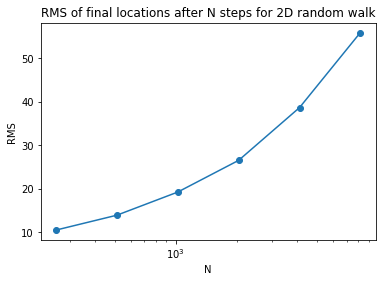

In [617]:
plt.figure()
plt.scatter(xaxis, y_rms)
plt.semilogx(xaxis, y_rms)
plt.title("RMS of final locations after N steps for 2D random walk")
plt.xlabel("N")
plt.ylabel("RMS")